<a href="https://colab.research.google.com/github/virija1800/socialmedia-sentiment-analysis/blob/main/program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOCIAL MEDIA SENTIMENT ANALYSIS

Sentiment Analysis is the automated process of analyzing text data and determining the sentiment of the opinion into positive, negative or neutral. Performing Sentiment Analysis on Twitter data can help companies obtain qualitative insights to understand how people are talking about their brand.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [ ]:
data = pd.read_csv('tweet.csv')
test_data=pd.read_csv('test_tweet.csv')

In [ ]:
total=data.append(test_data,ignore_index=True,sort=True)
total

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [ ]:
type(total)

pandas.core.frame.DataFrame

In [ ]:
total.shape

(49159, 3)

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 960.2+ KB


In [ ]:
total.describe()

,id,label
count,49159.000000,31962.000000
mean,24580.000000,0.070146
std,14191.125278,0.255397
min,1.000000,0.000000
25%,12290.500000,0.000000
50%,24580.000000,0.000000
75%,36869.500000,0.000000
max,49159.000000,1.000000


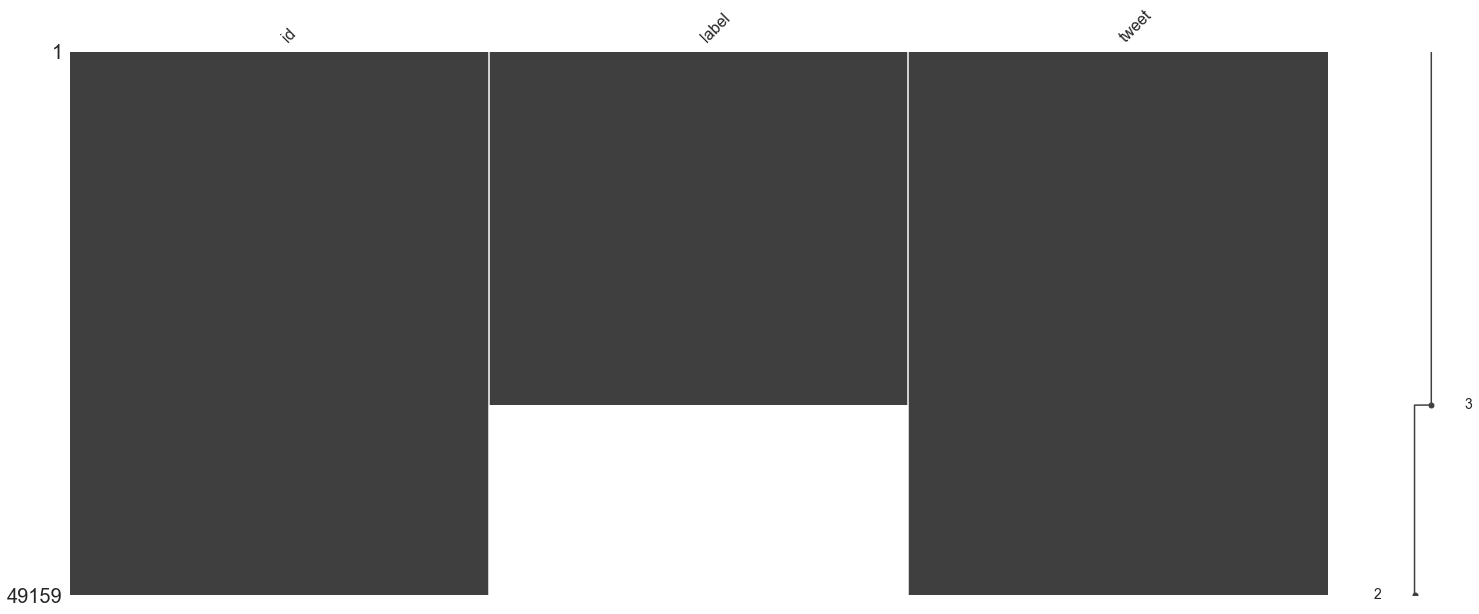

In [ ]:
ms.matrix(total)

In [ ]:
total['label'].unique()

array([ 0.,  1., nan])

In [ ]:
total['id'].unique()

array([    1,     2,     3, ..., 49157, 49158, 49159], dtype=int64)

In [ ]:
total['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

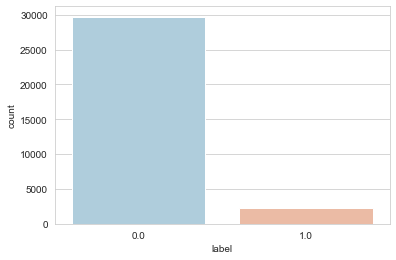

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=total,palette='RdBu_r')

In [ ]:
newtweet=[]
newtweet=[x.lower() for x in total['tweet']]

In [ ]:
total['tweet']=newtweet

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import *
#nltk.download('stopwords')
#nltk.download('punkt')
from string import punctuation

In [ ]:
X=total['tweet']

In [ ]:
X

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
49154    thought factory: left-right polarisation! #tru...
49155    feeling like a mermaid ð #hairflip #neverre...
49156    #hillary #campaigned today in #ohio((omg)) &am...
49157    happy, at work conference: right mindset leads...
49158    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 49159, dtype: object

In [ ]:
positive_hash=[]
negative_hash=[]
for i in total['tweet'][total['label']==0]:
    positive_hash.extend(re.findall(r"#(\w+)",i))
for i in total['tweet'][total['label']==1]:
    negative_hash.extend(re.findall(r"#(\w+)",i))


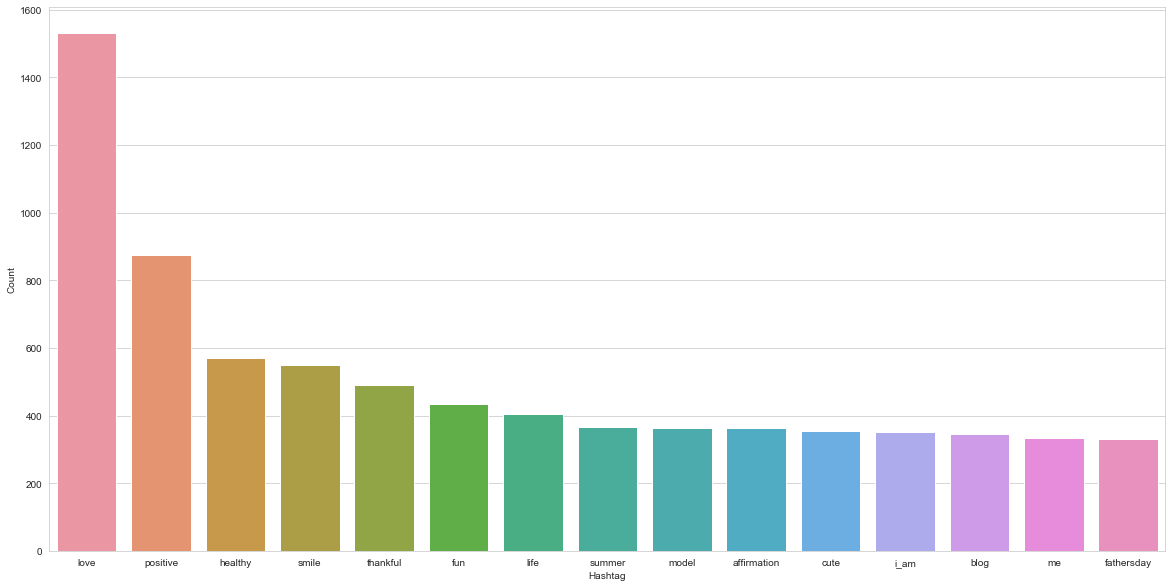

In [ ]:
a=nltk.FreqDist(positive_hash)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns="Count",n=15)
plt.figure(figsize=(20,10))
sns.barplot(data=d,x="Hashtag",y="Count")
plt.show()

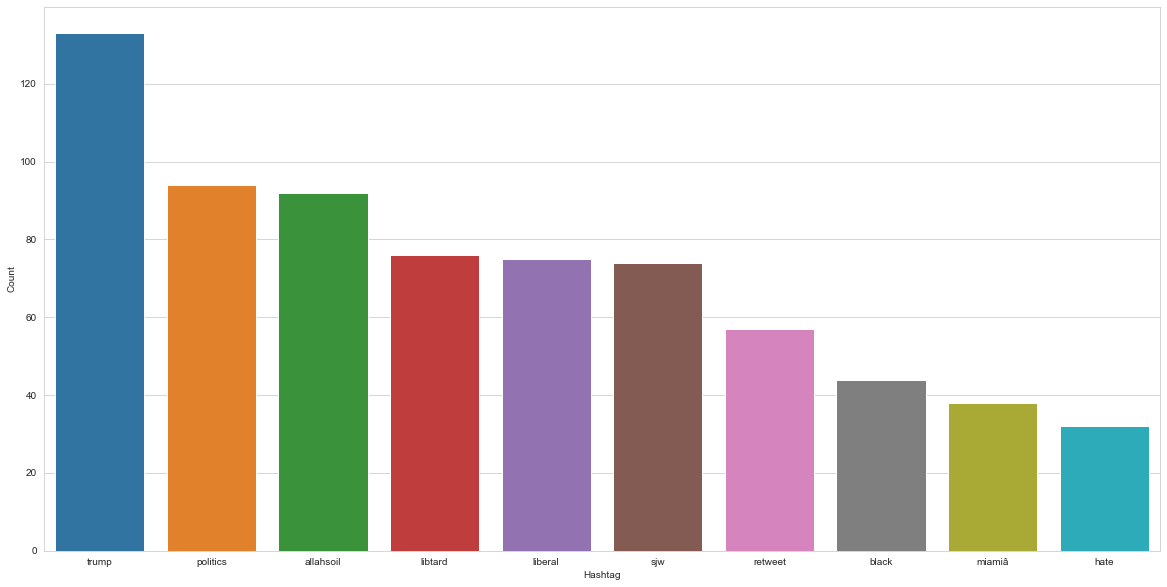

In [ ]:
a=nltk.FreqDist(negative_hash)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(20,10))
sns.barplot(data=d,x="Hashtag",y="Count")
plt.show()

In [ ]:
old_total_data=total.copy()
old_data=data.copy()
old_test_data=test_data.copy()
nt=[]
stemmer = PorterStemmer()
_stopwords = set(stopwords.words('english') + list(punctuation) + ['AT','USER','URL'])
for i in X:
    i=re.sub('@[^\s]+', 'AT_USER', i)
    i=re.sub(r'#([^\s]+)', r'\1', i)
    i=re.sub("[^a-zA-Z#]", " ",i)
    i=word_tokenize(i)
    s=[word for word in i if word not in _stopwords]
    s=[stemmer.stem(x) for x in s]
    nt.append(s)
total['tweet']=nt
nt

[['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run'],
 ['thank',
  'lyft',
  'credit',
  'use',
  'caus',
  'offer',
  'wheelchair',
  'van',
  'pdx',
  'disapoint',
  'getthank'],
 ['bihday', 'majesti'],
 ['model', 'love', 'u', 'take', 'u', 'time', 'ur'],
 ['factsguid', 'societi', 'motiv'],
 ['huge',
  'fan',
  'fare',
  'big',
  'talk',
  'leav',
  'chao',
  'pay',
  'disput',
  'get',
  'allshowandnogo'],
 ['camp', 'tomorrow', 'danni'],
 ['next',
  'school',
  'year',
  'year',
  'exam',
  'think',
  'school',
  'exam',
  'hate',
  'imagin',
  'actorslif',
  'revolutionschool',
  'girl'],
 ['love', 'land', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['welcom', 'gr'],
 ['ireland',
  'consum',
  'price',
  'index',
  'mom',
  'climb',
  'previou',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['ge

In [ ]:
def vocab(tweets):
    v=[]
    dic={}
    for word in tweets:
        v.extend(word)
    for word in v:
        if word in dic:
            dic[word]+=1
        else:
            dic[word]=1
    return(dic)
vocabulary=vocab(nt)
vocabulary

{'father': 1466,
 'dysfunct': 5,
 'selfish': 20,
 'drag': 27,
 'kid': 445,
 'run': 301,
 'thank': 2407,
 'lyft': 6,
 'credit': 28,
 'use': 511,
 'caus': 151,
 'offer': 71,
 'wheelchair': 6,
 'van': 12,
 'pdx': 8,
 'disapoint': 1,
 'getthank': 2,
 'bihday': 1366,
 'majesti': 17,
 'model': 625,
 'love': 5012,
 'u': 1850,
 'take': 1138,
 'time': 1955,
 'ur': 712,
 'factsguid': 15,
 'societi': 49,
 'motiv': 341,
 'huge': 61,
 'fan': 262,
 'fare': 8,
 'big': 321,
 'talk': 275,
 'leav': 310,
 'chao': 11,
 'pay': 446,
 'disput': 1,
 'get': 1943,
 'allshowandnogo': 1,
 'camp': 96,
 'tomorrow': 676,
 'danni': 10,
 'next': 521,
 'school': 354,
 'year': 863,
 'exam': 56,
 'think': 751,
 'hate': 456,
 'imagin': 72,
 'actorslif': 14,
 'revolutionschool': 1,
 'girl': 968,
 'land': 66,
 'allin': 6,
 'cav': 52,
 'champion': 26,
 'cleveland': 42,
 'clevelandcavali': 1,
 'welcom': 106,
 'gr': 18,
 'ireland': 48,
 'consum': 21,
 'price': 57,
 'index': 25,
 'mom': 218,
 'climb': 394,
 'previou': 63,
 'may

In [ ]:
total['tweet']

0        [father, dysfunct, selfish, drag, kid, dysfunc...
1        [thank, lyft, credit, use, caus, offer, wheelc...
2                                        [bihday, majesti]
3                      [model, love, u, take, u, time, ur]
4                              [factsguid, societi, motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, trump...
49155    [feel, like, mermaid, hairflip, neverreadi, fo...
49156    [hillari, campaign, today, ohio, omg, amp, use...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, shoegaz, newmus, ...
Name: tweet, Length: 49159, dtype: object

In [ ]:
for i in range(len(total['tweet'])):
    nt[i]=' '.join(total['tweet'][i])
total['tweet']=nt
total['tweet']

0            father dysfunct selfish drag kid dysfunct run
1        thank lyft credit use caus offer wheelchair va...
2                                           bihday majesti
3                              model love u take u time ur
4                                  factsguid societi motiv
                               ...                        
49154    thought factori left right polaris trump usele...
49155    feel like mermaid hairflip neverreadi formal w...
49156    hillari campaign today ohio omg amp use word l...
49157    happi work confer right mindset lead cultur de...
49158       song glad free download shoegaz newmus newsong
Name: tweet, Length: 49159, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.99, min_df=2, max_features=40000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(nt)

In [ ]:
train=bow[:31962,]
test=bow[31962:,]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,data['label'],random_state=101, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

c:\users\bhavya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted =  logmodel.predict(X_test)

In [ ]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, predicted))

[[8885   55]
 [ 337  312]]


In [ ]:
from sklearn.metrics import precision_score

print(precision_score(Y_test,predicted))

0.8501362397820164


In [ ]:
from sklearn.metrics import recall_score

print(recall_score(Y_test,predicted))

0.48073959938366717


In [ ]:
from sklearn.metrics import f1_score

print(f1_score(Y_test,predicted))

0.6141732283464568


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8940
           1       0.85      0.48      0.61       649

    accuracy                           0.96      9589
   macro avg       0.91      0.74      0.80      9589
weighted avg       0.96      0.96      0.95      9589



In [ ]:
predict=logmodel.predict(test)

In [ ]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
old_test_data['label']=predict

In [ ]:
old_test_data

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0
17195,49158,"happy, at work conference: right mindset leads...",0


In [ ]:
old_test_data['label'].value_counts()

0    16427
1      770
Name: label, dtype: int64

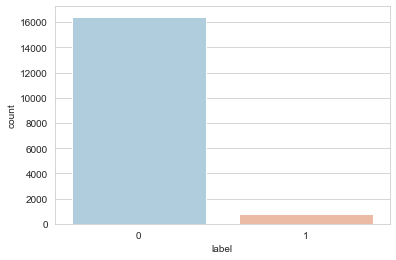

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=old_test_data,palette='RdBu_r')

In [ ]:
old_test_data[['id','label','tweet']].to_csv('new_test_tweet.csv', index=False)